In [1]:
import os
import numpy as np
import math
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from IPython.display import clear_output
from PIL import Image

import torch
import torch.nn as nn
from torch import autograd
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import Dataset, random_split
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchvision.datasets import FashionMNIST
from torchvision.utils import make_grid
from torchvision.utils import save_image

In [2]:
# basic random seed
import os 
import random
import numpy as np 

DEFAULT_RANDOM_SEED = 42

def seedBasic(seed=DEFAULT_RANDOM_SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
# torch random seed
import torch
def seedTorch(seed=DEFAULT_RANDOM_SEED):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
      
# basic + torch 
def seedEverything(seed=DEFAULT_RANDOM_SEED):
    seedBasic(seed)
    seedTorch(seed)

seedEverything()

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from IPython.display import clear_output
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class ProgressPlotter:
  def __init__(self) -> None:
    self._history_dict = defaultdict(list)
    self._images = defaultdict(list)

  def add_scalar(self, tag: str, value)-> None:
    self._history_dict[tag].append(value)
  
  def add_image(self, tag: str, value)-> None:
    self._images[tag].append(value)

  def display_plot(self, title=None)-> None:
    clear_output()
    n_keys = len(self._history_dict)
    fig, ax = plt.subplots(n_keys, 1, figsize=(12, 3*n_keys))
    for key_idx, key in enumerate(self._history_dict.keys()):
      history_len = len(self._history_dict[key])
      if n_keys == 1:
        ax.plot(self._history_dict[key], color='c', marker="X")
        ax.set_ylabel(key)
        ax.set_xlabel('step')
        # ax.set_xticks(np.arange(history_len))
        # ax.set_xticklabels(np.arange(history_len))
        if title is not None:
          ax.set_title(str(title))
      elif n_keys > 1:
        ax[key_idx].plot(self._history_dict[key], color='c', marker="X")
        ax[key_idx].set_ylabel(key)
        ax[key_idx].set_xlabel('step')
        # ax[key_idx].set_xticks(np.arange(history_len))
        # ax[key_idx].set_xticklabels(np.arange(history_len))
        if title is not None:
          ax[0].set_title(str(title))
    fig.tight_layout()
    plt.show()

  def display_last_image(self, tag: str):
    clear_output()
    if len(self._images[tag]) > 0:
      image = self._images[tag][-1]
      fig, ax = plt.subplots(figsize=(8, 8))
      ax.imshow(image)
      ax.axis('off')
      fig.tight_layout()
      plt.show()
    else:
      print(f'There are no images to show with tag {tag}')

  @property
  def history_dict(self):
    return dict(self._history_dict)
 

In [5]:
!pip install astronn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 56.8 MB/s eta 0:00:00


In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context  #ignore url error

In [7]:
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
images, labels = load_galaxy10()

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


Galaxy10.h5:  98%|█████████▊| 207M/210M [00:02<00:00, 78.6MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:05, 37.9MB/s]                           


In [8]:
class GalaxyDataset(Dataset):
    def __init__(self, images, labels, transform):
        super().__init__()
        self.images = images
        self.labels = labels
        self.transform = transform

    def __getitem__(self, indx):
        image = self.images[indx]
        label = self.labels[indx]

        if self.transform:
            image = self.transform(image)
        
        return image, label

    def __len__(self):
        return len(self.images)

In [9]:
transform = transforms.Compose([
        transforms.ToTensor(),
])

galaxy = GalaxyDataset(images, labels, transform)

In [10]:
cl_indx = [] # indexes

for i in np.arange(0, 10): # for each class(10)
    for num, sample in enumerate(galaxy): 
        if sample[1] == i:
            cl_indx.append(num)
            break

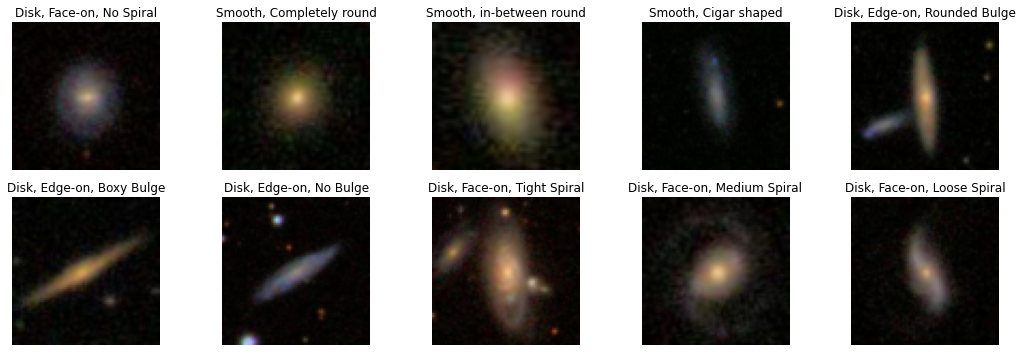

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
for num, indx in enumerate(cl_indx):
    if num < 5:
        row = 0
    else:
        row = 1
        num -= 5
    ax[row,num].imshow(galaxy[indx][0].permute(1, 2, 0))
    ax[row,num].set_title(galaxy10cls_lookup(galaxy[indx][1]))
    ax[row,num].axis('off')

plt.tight_layout()

In [12]:
class Generator(nn.Module):
    r"""
    Args:
        image_size (int): The size of the image. (Default: None)
        channels (int): The channels of the image. (Default: None)
        num_classes (int): Number of classes for dataset. (Default: None)
    """

    def __init__(self, image_size: int=None, channels: int=None, num_classes: int=None) -> None:
        super(Generator, self).__init__()
        self.image_size = image_size
        self.channels = channels

        self.label_embedding = nn.Embedding(num_classes, num_classes) 

        self.main = nn.Sequential(
            nn.Linear(100 + num_classes, 128),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(1024, channels * image_size * image_size),
            nn.Tanh()
            
        )

    def forward(self, inputs: torch.Tensor, labels: list=None) -> torch.Tensor:
        """
        Args:
            inputs (tensor): input tensor into the calculation.
            labels (list):  input tensor label.
        Returns:
            A four-dimensional vector (N*C*H*W).
        """

        conditional_inputs = torch.cat([inputs, self.label_embedding(labels)], dim=-1) 
        out = self.main(conditional_inputs)
        out = out.reshape(out.size(0), self.channels, self.image_size, self.image_size)

        return out

In [13]:
class Discriminator(nn.Module):
    r"""
    Args:
        image_size (int): The size of the image. (Default: None)
        channels (int): The channels of the image. (Default: None)
        num_classes (int): Number of classes for dataset. (Default: None)
    """

    def __init__(self, image_size: int=None, channels: int=None, num_classes: int=None) -> None:
        super(Discriminator, self).__init__()

        self.label_embedding = nn.Embedding(num_classes, num_classes)  

        self.main = nn.Sequential(
            nn.Linear(channels * image_size * image_size + num_classes, 512),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(512, 256),
            nn.LeakyReLU(negative_slope=0.2, inplace=True),

            nn.Linear(256, 1),
            nn.Sigmoid()
            
        )

    def forward(self, inputs: torch.Tensor, labels: list=None) -> torch.Tensor:
        r""" Defines the computation performed at every call.
        Args:
            inputs (tensor): input tensor into the calculation.
            labels (list):  input tensor label.
        Returns:
            A four-dimensional vector (N*C*H*W).
        """
        inputs = torch.flatten(inputs, 1)
        conditional = self.label_embedding(labels)
        conditional_inputs = torch.cat([inputs, conditional], dim=-1)
        out = self.main(conditional_inputs)

        return out

In [14]:
def train(generator, discriminator, 
          discriminator_optimizer, 
          generator_optimizer,
          adversarial_criterion,
          dataloader, device,
          fixed_noise,
          fixed_conditional,
          epochs):
    pp = ProgressPlotter()
    for epoch in range(epochs):
        discriminator.train()
        generator.train()

        for i, (inputs, target) in enumerate(dataloader):
            inputs = inputs.to(device)
            target = target.to(device).long()
            batch_size = inputs.size(0)

            # The real sample label is 1, and the generated sample label is 0.
            real_label = torch.full((batch_size, 1), 1, dtype=inputs.dtype).to(device) 
            fake_label = torch.full((batch_size, 1), 0, dtype=inputs.dtype).to(device) 

            noise = torch.randn([batch_size, 100]) 
            conditional = torch.randint(0, 10, (batch_size,))  

            noise = noise.to(device)
            conditional = conditional.to(device)

            ##############################################
            # (1) Update D network: max E(x)[log(D(x))] + E(z)[log(1- D(z))]
            ##############################################
            # Set discriminator gradients to zero.
            discriminator.zero_grad()

            # Train with real.
            real_output = discriminator(inputs, target)  
            d_loss_real = adversarial_criterion(real_output, real_label)  
            d_loss_real.backward()

            # Train with fake.
            fake = generator(noise, conditional) 
            fake_output =  discriminator(fake.detach(), conditional) 
            d_loss_fake = adversarial_criterion(fake_output, fake_label) 
            d_loss_fake.backward()

            # Count all discriminator losses.
            d_loss = d_loss_real + d_loss_fake 
            discriminator_optimizer.step()

            ##############################################
            # (2) Update G network: min E(z)[log(1- D(z))]
            ##############################################
            # Set generator gradients to zero.
            generator.zero_grad()

            fake_output = discriminator(fake, conditional)  
            g_loss = adversarial_criterion(fake_output, real_label) 
            g_loss.backward()
            generator_optimizer.step()

            iters = i + epoch * len(dataloader) + 1
                
            print(f"\rEpoch {epoch}/{epochs} - {i}/{len(dataloader)} - loss_D: {d_loss.item():.4f} - loss_G: {g_loss.item():.4f}", end="")
            
        
        pp.add_scalar("Train/D_Loss", d_loss.item())
        pp.add_scalar("Train/G_Loss", g_loss.item())
        # Each Epoch validates the model once.
        with torch.no_grad():
            # Switch model to eval mode.
            generator.eval()
            sr = generator(fixed_noise, fixed_conditional)
            img_tensor = sr.cpu().detach()
            img_grid = make_grid(img_tensor, nrow=5).type(torch.float).permute(1, 2, 0).numpy()
            pp.add_image('Galaxies', img_grid)
        pp.display_last_image('Galaxies')

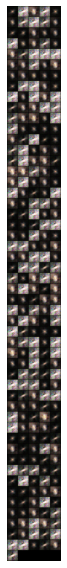

In [15]:
batch_size = 256
num_classes = 10

image_size = 69
channels = 3

epochs = 100
lr = 2e-4  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netG = Generator(image_size=image_size, channels=channels, num_classes=num_classes).to(device)
netD = Discriminator(image_size=image_size, channels=channels, num_classes=num_classes).to(device)

data_loader = torch.utils.data.DataLoader(galaxy, batch_size=batch_size, shuffle=True)

loss_func = nn.BCELoss()  

optD = torch.optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optG = torch.optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

fixed_noise= torch.randn([batch_size, 100]).to(device)  
fixed_conditional= torch.randint(0, 1, (batch_size,)).to(device)  

train(generator=netG, discriminator=netD, 
          discriminator_optimizer=optD, 
          generator_optimizer=optG,
          adversarial_criterion=loss_func,
          dataloader=data_loader, device=device,
          fixed_noise=fixed_noise,
          fixed_conditional=fixed_conditional,
          epochs=epochs)

IndexError: ignored

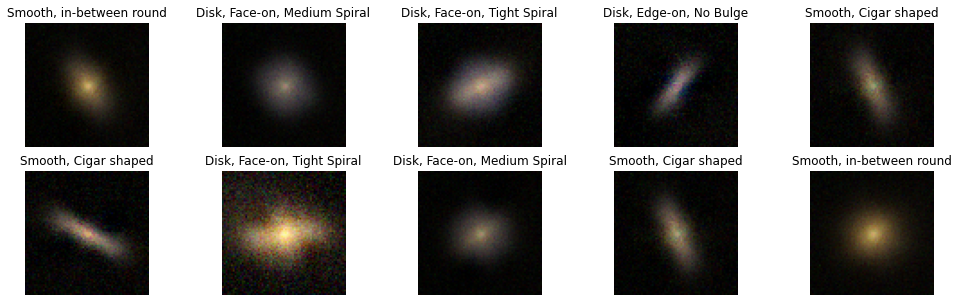

In [45]:
noise = torch.randn([batch_size, 100]).to(device)
conditional = torch.randint(0, 10, (batch_size,)).to(device)

with torch.no_grad():
    galaxy_samples = netG(noise, conditional) 

fig,ax = plt.subplots(nrows=2, ncols=5, figsize=(17, 5))
for num, (sample, label) in enumerate(zip(galaxy_samples, conditional)):
    if num < 5:
        row = 0
    else:
        row = 1
        num -= 5
    ax[row,num].imshow((sample.cpu().permute(1, 2, 0)*255).long())
    ax[row,num].set_title(galaxy10cls_lookup(label.item()))
    ax[row,num].axis('off')

plt.tight_layout()